### Index No: 190072E
### Name    : E. M. D. A. Bandara


In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

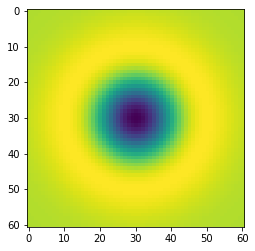

In [3]:
#Blobs 
#Question 01
sigma = 10
hw = 3*sigma

step = 1
X = np.arange(-hw, hw + step, step)
Y = np.arange(-hw, hw + step, step)

XX, YY = np.meshgrid(X, Y)

log = 1/(2*np.pi*sigma**2)*np.exp(-(XX**2 + YY**2)/(2*sigma**2))*(XX**2/sigma**2 +YY**2/sigma**2 -2  )

plt.imshow(log)



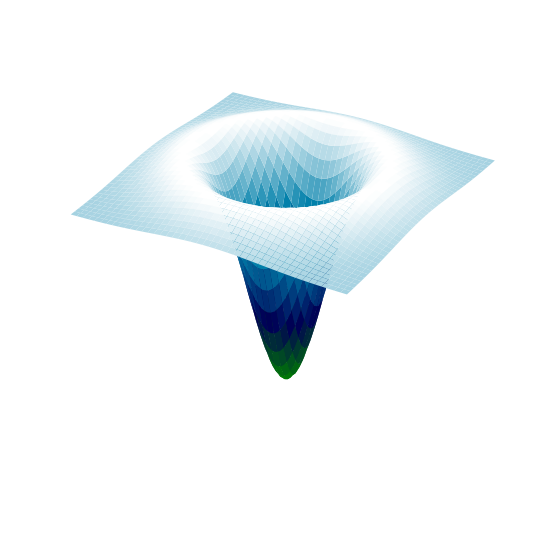

In [35]:
from  mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig  = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection = '3d')

surf = ax.plot_surface(XX, YY, log, cmap = cm.ocean, linewidth = 0, antialiased = True)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
plt.axis('off')
plt.show()


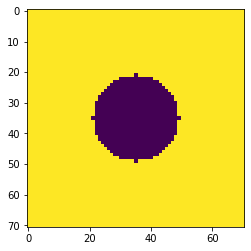

In [8]:
#Question 2
w, h = 71, 71
hw = w//2
hh = h//2

f = np.ones((h,w), dtype = np.float32)*255
step = 1
X = np.arange(-hh, hh + step, step)
Y = np.arange(-hw, hw + step, step)
XX, YY = np.meshgrid(X, Y)
r = w//5

f *= XX**2 + YY**2 > r**2
plt.imshow(f)


(35, 35, 5)
10


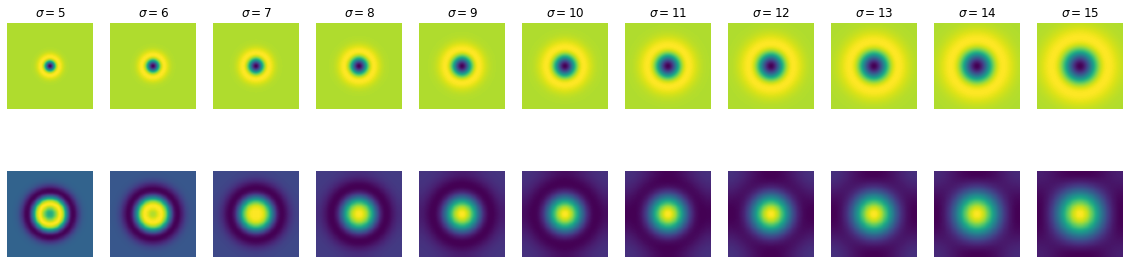

In [36]:
s = 11
fig, ax = plt.subplots(2, s, figsize = (20,5))
scale_space = np.empty((h, w, s), dtype = np.float32)

sigmas = np.arange(5,16,1)
for i,sigma in enumerate(sigmas):
    log_hw = 3*np.max(sigmas)
    step = 1
    X = np.arange(-log_hw, log_hw + step, step)
    Y = np.arange(-log_hw, log_hw + step, step)
    XX, YY = np.meshgrid(X, Y)
    log = log = 1/(2*np.pi*sigma**2)*np.exp(-(XX**2 + YY**2)/(2*sigma**2))*(XX**2/sigma**2 +YY**2/sigma**2 -2  )
    f_log = cv.filter2D(f, -1, log)
    scale_space[:, : , i] = f_log
    ax[0, i].imshow(log)
    ax[0, i].axis('off')
    ax[0, i].set_title(r'$\sigma = {}$'.format(sigma))
    ax[1, i].imshow(f_log)
    ax[1, i].axis('off')

indices = np.unravel_index(np.argmax(scale_space, axis = None), scale_space.shape)
print(indices)
print(sigmas[indices[2]])


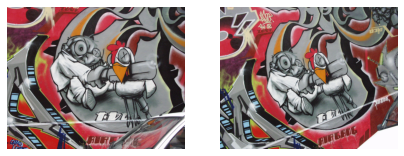

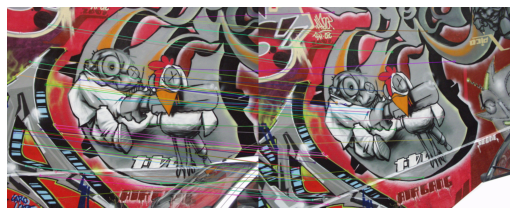

In [49]:
#Question 3
import cv2
import matplotlib.pyplot as plt

img1 = cv.imread("graf/img1.ppm")
img2 = cv.imread("graf/img2.ppm")

assert img1 is not None
assert img2 is not None

grey1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
grey2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

fig, ax = plt.subplots(1, 2, figsize = (7, 12))
ax[0].imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))
ax[0].axis('off')
ax[1].imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
ax[1].axis('off')

plt.show()

sift = cv.SIFT_create()

keypoints_img1, descriptors_img1 = sift.detectAndCompute(img1,None)
keypoints_img2, descriptors_img2 = sift.detectAndCompute(img2,None)

#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_img1, descriptors_img2)
matches = sorted(matches, key = lambda x:x.distance)


fig, ax = plt.subplots(1, 1, figsize = (9, 18))
img3 = cv2.drawMatches(img1, keypoints_img1, img2, keypoints_img2, matches[:50], img2, flags=2)
ax.imshow(cv.cvtColor(img3, cv.COLOR_BGR2RGB))
ax.axis('off')
plt.show()




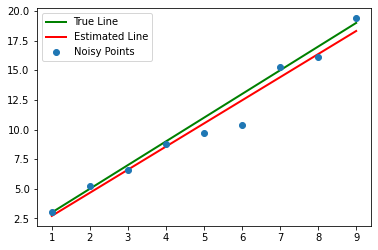

In [27]:
#Line Fitting
#Question 01
m = 2 
c = 1
x = np . arange (1 ,10 , 1)
np.random.seed(45)

sigma = 1 
n = sigma*np . random . randn ( len ( x ) )
o = np . zeros ( x . shape )
# o[=1] = 20
y = m*x + c + n + o

n = len(x)
X = np.concatenate([x.reshape(n,1), np.ones((n,1))], axis = 1)
B = np.linalg.pinv(X.T @ X) @ X.T @ y
mstar = B[0]
cstar = B[1]


plt.plot([x[0], x[-1]], [m*x[0] + c, m*x[-1] + c], color = 'g', linewidth = 2, label = 'True Line')
plt.plot([x[0], x[-1]], [mstar*x[0] + cstar, mstar*x[-1] + cstar], color = 'r', linewidth = 2, label = 'Estimated Line')
plt.plot(x, y, 'o', label = "Noisy Points")
plt.legend()

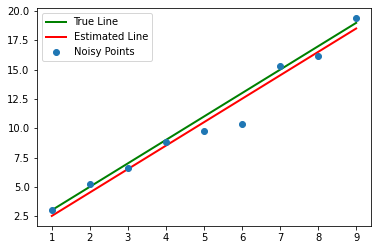

In [34]:
#Question 02
m = 2 
c = 1
x = np . arange (1 ,10 , 1)
np.random.seed(45)

sigma = 1
n = sigma*np . random . randn ( len ( x ) )
o = np . zeros ( x . shape )
# o[=1] = 20
y = m*x + c + n + o

n = len(x)

u11 = np.sum((x - np.mean(x))**2)
u12 = np.sum((x - np.mean(x))*(y - np.mean(y)))
u21 = u12
u22 = np.sum((y - np.mean(y))**2)

U = np.array([[u11, u12], [u21, u22]])
W, V = np.linalg.eig(U)

ev_corresponding_to_smalles_ev = V[:, np.argmin(W)]

a = ev_corresponding_to_smalles_ev[0]
b = ev_corresponding_to_smalles_ev[1]
d = a*np.mean(x) + b*np.mean(y)

mstar = -a/b
cstar = d/b

plt.plot([x[0], x[-1]], [m*x[0] + c, m*x[-1] + c], color = 'g', linewidth = 2, label = 'True Line')
plt.plot([x[0], x[-1]], [mstar*x[0] + cstar, mstar*x[-1] + cstar], color = 'r', linewidth = 2, label = 'Estimated Line')
plt.plot(x, y, 'o', label = "Noisy Points")
plt.legend()